In [42]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('salary_data_cleaned.csv')

In [45]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,"Senior Data Scientist , Advanced Analytics",$123K - $199K (Glassdoor est.),Senior Data Scientist\r\nRaytheon Missiles & D...,3.8,Raytheon Missiles & Defense\r\n3.8,"Andover, MA",-1,10000+ Employees,2020,Company - Public,...,161.0,Raytheon Missiles & Defense\r\n,MA,0,0,1,0,0,1,0
1,Data Scientist 2,$52K - $95K (Glassdoor est.),Description\r\nDigital Health and Analytics wi...,3.9,Humana\r\n3.9,"Louisville, KY",-1,10000+ Employees,1961,Company - Public,...,73.5,Humana\r\n,KY,0,59,1,0,1,0,0
2,Process Scientist,$39K - $89K (Glassdoor est.),Position Summary\r\nCTK is seeking a highly mo...,3.6,CTK Biotech\r\n3.6,"Poway, CA",-1,1 to 50 Employees,1998,Company - Private,...,64.0,CTK Biotech\r\n,CA,0,22,0,0,0,0,1
3,Senior Data Engineer,$67K - $127K (Glassdoor est.),Join our team dedicated to developing and exec...,4.6,Novetta\r\n4.6,"Reston, VA",-1,501 to 1000 Employees,2012,Company - Private,...,97.0,Novetta\r\n,VA,0,8,1,0,1,1,1
4,Data Scientist,$69K - $113K (Glassdoor est.),"Working out of our Chevy Chase, MD/Washington ...",3.5,GEICO\r\n3.5,"Chevy Chase, MD",-1,10000+ Employees,1936,Subsidiary or Business Segment,...,91.0,GEICO\r\n,MD,0,84,1,0,1,1,1


In [46]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [47]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Sector (ADD)

##  Competitor count  (KIV)

## hourly wage to annual 

#remove new line from job title

In [48]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [122]:
df.job_simp.value_counts()

na                38
data scientist    30
analyst           24
data engineer      8
Name: job_simp, dtype: int64

In [123]:
df['seniority'] = df['Job Title'].apply(seniority)

In [124]:
df.seniority.value_counts()

na        80
senior    20
Name: seniority, dtype: int64

In [125]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

MD    17
VA     8
MA     8
CA     7
UT     6
FL     6
TX     5
WI     4
KY     3
PA     3
ME     3
NM     3
OH     2
IL     2
NY     2
NJ     2
MO     2
NC     2
CO     1
DE     1
AL     1
DC     1
MS     1
GA     1
LA     1
MI     1
SC     1
WA     1
KS     1
OR     1
RI     1
IA     1
CT     1
Name: job_state, dtype: int64

In [126]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0     4667
1     3555
2     2140
3     6053
4     4771
      ... 
95    4988
96    2063
97    3236
98    3099
99    5013
Name: desc_len, Length: 100, dtype: int64

In [172]:
#Sector
df['job_sector'] = df.apply(lambda x: 1 if x.Industry == x.Sector else 0, axis = 1)

In [173]:
#Sector
df = df[df['job_sector']!='-1']

In [170]:
#df['job_sector'] = df['Sector']

In [174]:
df.job_sector.value_counts()

0    70
1    27
Name: job_sector, dtype: int64

In [175]:
#Competitor count
#df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [176]:
#df['Competitors']

In [177]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [178]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
18,1,864,1440
28,1,576,1024


In [179]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [180]:
df['company_txt']

0        Raytheon Missiles & Defense
1                             Humana
2                        CTK Biotech
3                            Novetta
4                              GEICO
                   ...              
95                            Leidos
96                  EnLink Midstream
97                   ISO New England
98              Fidelity Investments
99    OnPoint Community Credit Union
Name: company_txt, Length: 97, dtype: object

In [181]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp,job_sector
count,97.000000,97.0,97.000000,97.0,97.000000,97.0,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,97.0,97.000000,97.000000,97.000000,97.000000,97.0,97.000000
mean,3.698969,-1.0,1717.628866,-1.0,0.020619,0.0,88.958763,149.721649,99.845361,0.0,52.226804,0.309278,0.0,0.113402,0.164948,0.608247,4433.865979,-1.0,0.278351
std,0.399868,0.0,650.370589,0.0,0.142842,0.0,96.797891,163.683112,28.148912,0.0,45.293834,0.464597,0.0,0.318731,0.373062,0.490678,1500.616329,0.0,0.450515
min,2.700000,-1.0,-1.000000,-1.0,0.000000,0.0,32.000000,57.000000,25.000000,0.0,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1653.000000,-1.0,0.000000
25%,3.500000,-1.0,1913.000000,-1.0,0.000000,0.0,59.000000,99.000000,79.000000,0.0,18.000000,0.000000,0.0,0.000000,0.000000,0.000000,3236.000000,-1.0,0.000000
50%,3.700000,-1.0,1961.000000,-1.0,0.000000,0.0,67.000000,127.000000,95.000000,0.0,40.000000,0.000000,0.0,0.000000,0.000000,1.000000,4441.000000,-1.0,0.000000
75%,3.900000,-1.0,1996.000000,-1.0,0.000000,0.0,97.000000,155.000000,126.000000,0.0,84.000000,1.000000,0.0,0.000000,0.000000,1.000000,5387.000000,-1.0,1.000000
max,4.600000,-1.0,2020.000000,-1.0,1.000000,0.0,864.000000,1440.000000,161.000000,0.0,172.000000,1.000000,0.0,1.000000,1.000000,1.000000,8947.000000,-1.0,1.000000


In [182]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp', 'job_sector'],
      dtype='object')

<AxesSubplot:>

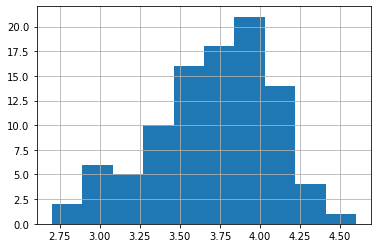

In [183]:
df.Rating.hist()

<AxesSubplot:>

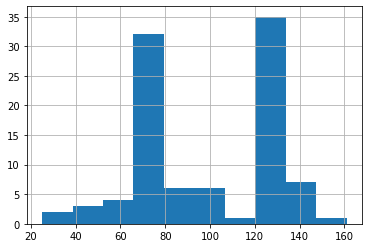

In [184]:
 df.avg_salary.hist()

<AxesSubplot:>

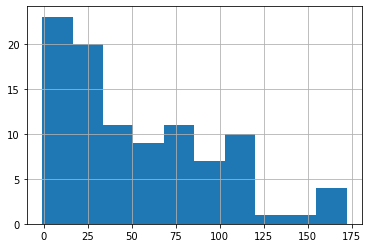

In [185]:
df.age.hist()

<AxesSubplot:>

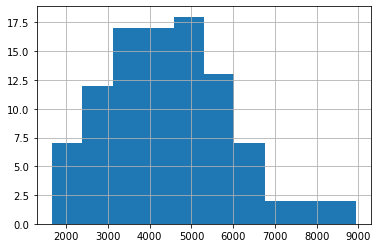

In [186]:
df.desc_len.hist()

<AxesSubplot:>

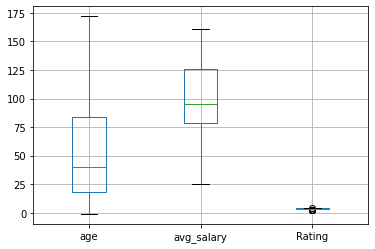

In [187]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

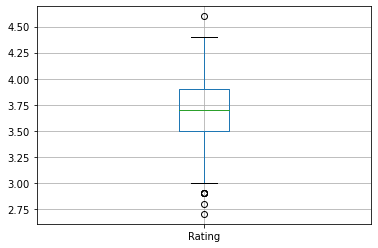

In [188]:
df.boxplot(column = 'Rating')

In [189]:
df[['age','avg_salary','Rating','desc_len', 'job_sector']].corr()

,age,avg_salary,Rating,desc_len,job_sector
age,1.000000,0.026364,0.357749,0.242543,0.058642
avg_salary,0.026364,1.000000,0.113445,-0.010937,-0.053658
Rating,0.357749,0.113445,1.000000,0.147620,0.192426
desc_len,0.242543,-0.010937,0.147620,1.000000,0.170670
job_sector,0.058642,-0.053658,0.192426,0.170670,1.000000


<AxesSubplot:>

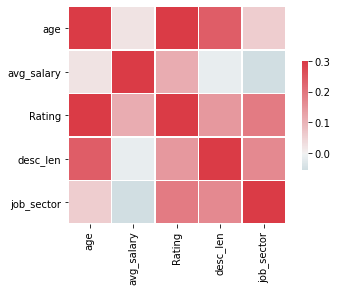

In [190]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','job_sector']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [191]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp', 'job_sector'],
      dtype='object')

In [192]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 72


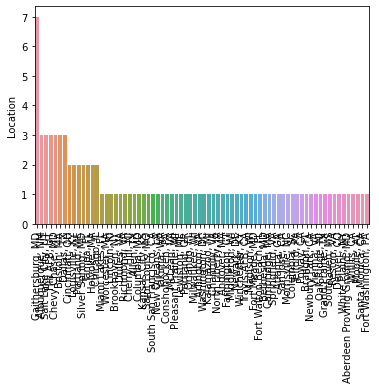

graph for Headquarters: total = 1


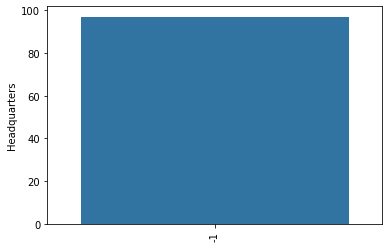

graph for Size: total = 8


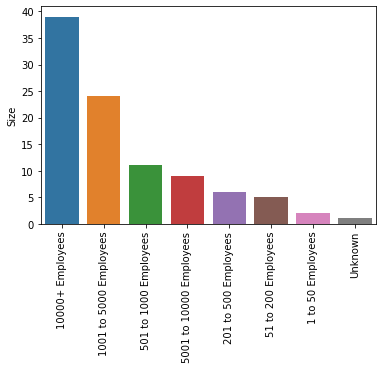

graph for Type of ownership: total = 6


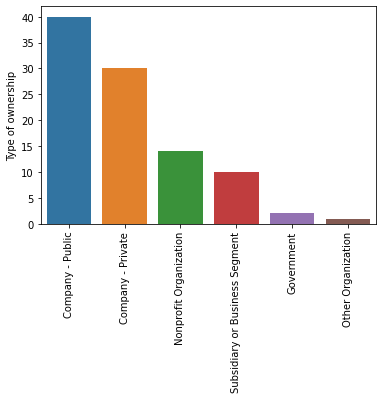

graph for Industry: total = 30


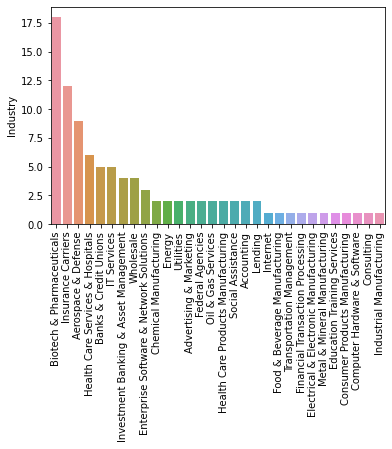

graph for Sector: total = 14


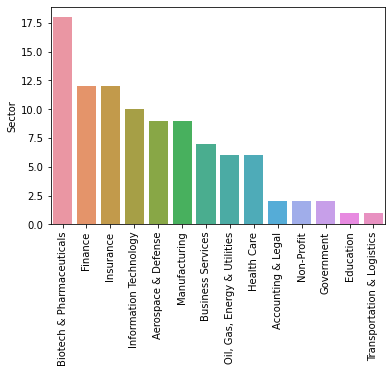

graph for Revenue: total = 12


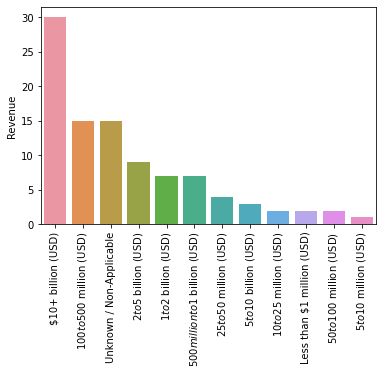

graph for company_txt: total = 73


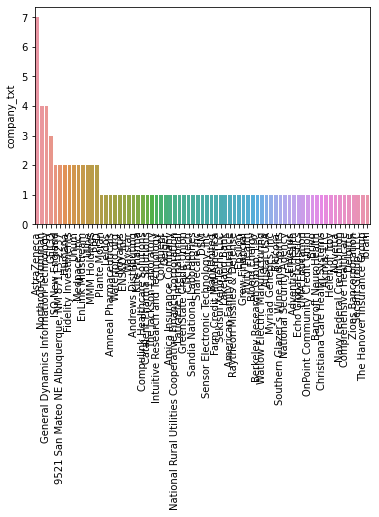

graph for job_state: total = 33


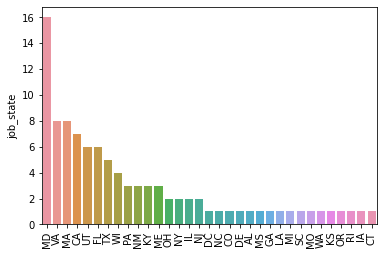

graph for same_state: total = 1


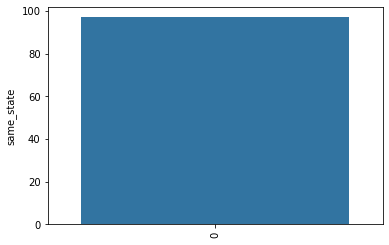

graph for python_yn: total = 2


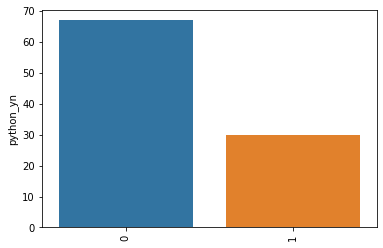

graph for R_yn: total = 1


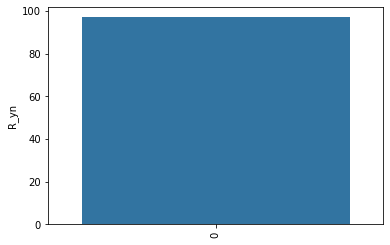

graph for spark: total = 2


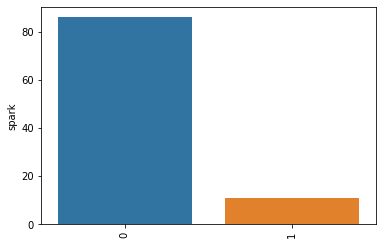

graph for aws: total = 2


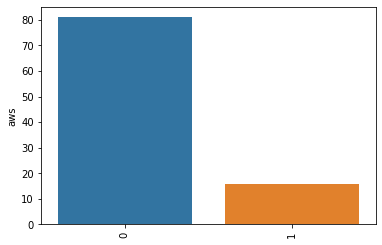

graph for excel: total = 2


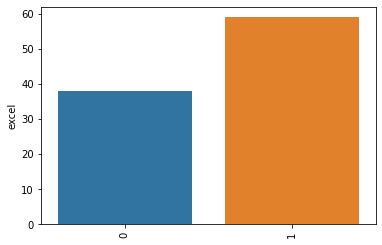

graph for job_simp: total = 4


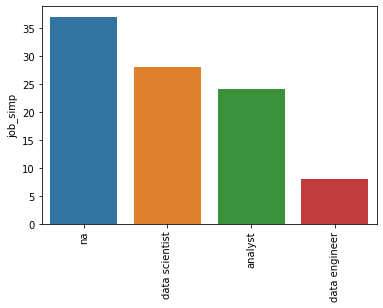

graph for seniority: total = 2


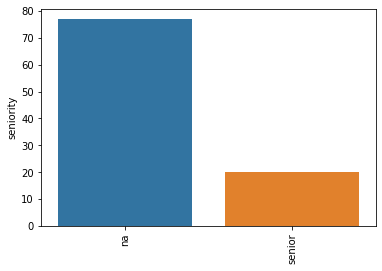

In [198]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation= 90)
    plt.show()

graph for Location: total = 20


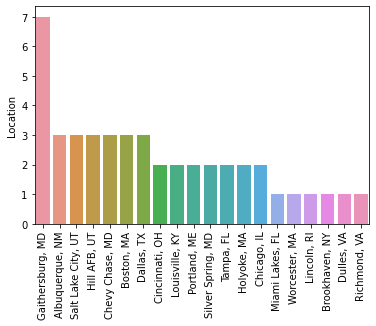

graph for Headquarters: total = 1


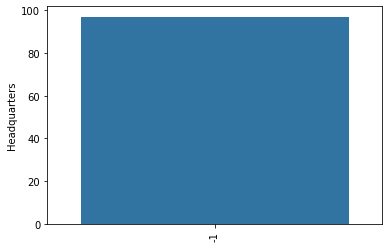

graph for company_txt: total = 20


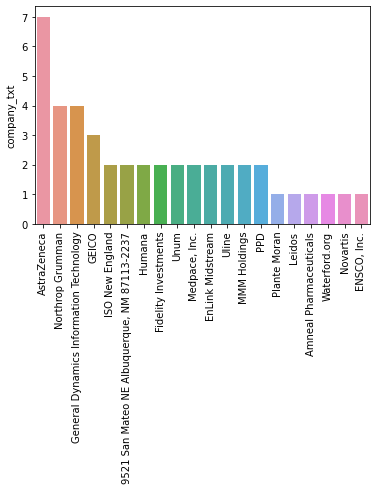

In [199]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [200]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,99.791667
data engineer,82.875000
data scientist,109.267857
na,96.418919


In [201]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na         100.325000
               senior      97.125000
data engineer  na          79.416667
               senior      93.250000
data scientist na         102.694444
               senior     121.100000
na             na          95.681818
               senior     102.500000

In [202]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na              126.000000
          data scientist  126.000000
          analyst         126.000000
WA        analyst          79.000000
VA        na               79.000000
          data scientist   97.500000
          data engineer    88.000000
          analyst         126.000000
UT        na              126.000000
          data scientist  126.000000
          data engineer    79.000000
TX        analyst         106.750000
          data scientist   79.000000
          na              126.000000
SC        na               62.000000
RI        analyst          79.000000
PA        na               82.000000
          data scientist   99.750000
OR        analyst         134.500000
OH        na               52.000000
NY        na               49.500000
          analyst          79.000000
NM        na              126.000000
          data scientist  126.000000
NJ        analyst         126.000000
NC        data engineer    79.000000
MS        analyst          79.000000
MO        data scientist   79.000000
MI        analyst          49.000000
ME        data scientist  126.000000
          analyst          79.000000
MD        na              113.125000
          data scientist   91.000000
          data engineer    81.666667
MA        na               79.000000
          data scientist  124.750000
          analyst         106.750000
LA        analyst         126.000000
KY        data scientist   94.000000
          na               55.500000
KS        na               79.000000
IL        na              135.000000
          data scientist  134.500000
IA        analyst          44.500000
GA        data engineer    84.000000
FL        na              126.000000
          data scientist  102.500000
          analyst          94.666667
DE        na               79.000000
DC        data scientist   79.000000
CT        na               89.500000
CO        data scientist  126.000000
CA        na               80.500000
          analyst         115.250000
AL        analyst          74.500000

In [203]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [204]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na                       1
          data scientist           1
          analyst                  2
WA        analyst                  1
VA        na                       2
          data scientist           3
          data engineer            2
          analyst                  1
UT        na                       1
          data scientist           4
          data engineer            1
TX        analyst                  2
          data scientist           2
          na                       1
SC        na                       1
RI        analyst                  1
PA        na                       1
          data scientist           2
OR        analyst                  1
OH        na                       2
NY        na                       1
          analyst                  1
NM        na                       2
          data scientist           1
NJ        analyst                  2
NC        data engineer            1
MS        analyst                  1
MO        data scientist           1
MI        analyst                  1
ME        data scientist           2
          analyst                  1
MD        na                      12
          data scientist           1
          data engineer            3
MA        na                       2
          data scientist           4
          analyst                  2
LA        analyst                  1
KY        data scientist           2
          na                       1
KS        na                       1
IL        na                       1
          data scientist           1
IA        analyst                  1
GA        data engineer            1
FL        na                       1
          data scientist           2
          analyst                  3
DE        na                       1
DC        data scientist           1
CT        na                       1
CO        data scientist           1
CA        na                       5
          analyst                  2
AL        analyst                  1

In [205]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
IL,134.50
CO,126.00
ME,126.00
NM,126.00
UT,126.00
WI,126.00
MA,124.75
FL,102.50
PA,99.75


In [206]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership

In [213]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']] 

In [227]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))
          
    #.sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
3.0     126.000000
2.8     126.000000
3.8     123.916667
4.1     105.428571
3.6     105.000000
3.9     104.312500
4.2     103.928571
3.5     102.722222
3.7      99.250000
4.0      97.800000
4.6      97.000000
3.2      91.750000
3.4      89.750000
3.1      87.500000
3.3      87.000000
4.3      79.000000
4.4      79.000000
2.7      79.000000
2.9      78.200000
Industry
                                         avg_salary
Industry                                           
Transportation Management                135.000000
Federal Agencies                         126.000000
Social Assistance                        126.000000
Chemical Manufacturing                   126.000000
Computer Hardware & Software             126.000000
Consulting                               126.000000
Food & Beverage Manufacturing            123.000000
Lending                                  120.250000
Investment Banking & Asset Management    118.500000
Wholesale    

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [228]:
 pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),6.0,1.0
$10 to $25 million (USD),1.0,1.0
$10+ billion (USD),20.0,10.0
$100 to $500 million (USD),7.0,8.0
$2 to $5 billion (USD),8.0,1.0
$25 to $50 million (USD),2.0,2.0
$5 to $10 billion (USD),2.0,1.0
$5 to $10 million (USD),1.0,NaN
$50 to $100 million (USD),1.0,1.0


In [232]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

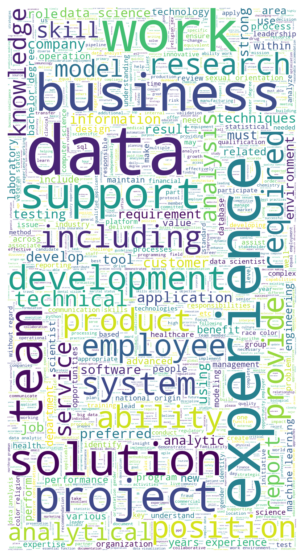

In [233]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()